<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [54]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [55]:
# Read Titanic Dataset
titanic_csv = 'titanic.csv'
titanic = pd.read_csv(titanic_csv)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore Dataset

## Head

In [56]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [57]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [58]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [59]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [60]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [62]:
# ANSWER
titanic[titanic.Age.isnull()]
titanic['Age'].fillna(titanic.groupby(['Sex','Pclass']).Age.transform("median"),inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin

In [65]:
# ANSWER
titanic['Cabin'].fillna('No Record', inplace=True)

### Embarked

In [64]:
# ANSWER
titanic['Embarked'].fillna('No Record', inplace=True)
titanic.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Describe

Describe your dataset.

In [66]:
# ANSWER
titanic.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare      Cabin  Embarked
0              1         0       3  ...   7.2500  No Record         S
1              2         1       1  ...  71.2833        C85         C
2              3         1       3  ...   7.9250  No Record         S
3              4         1       1  ...  53.1000       C123         S
4              5         0       3  ...   8.0500  No Record         S
..           ...       ...     ...  ...      ...        ...       ...
886          887         0       2  ...  13.0000  No Record         S
887          888         1       1  ...  30.0000        B42         S
888          889         0       3  ...  23.4500  No Record         S
889          890         1       1  ...  30.0000       C148         C
890          891         0       3  ...   7.7500  No Record         Q

[891 rows x 12 columns]>

# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [67]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

In [68]:
# ANSWER
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Record,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Record,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Record,S


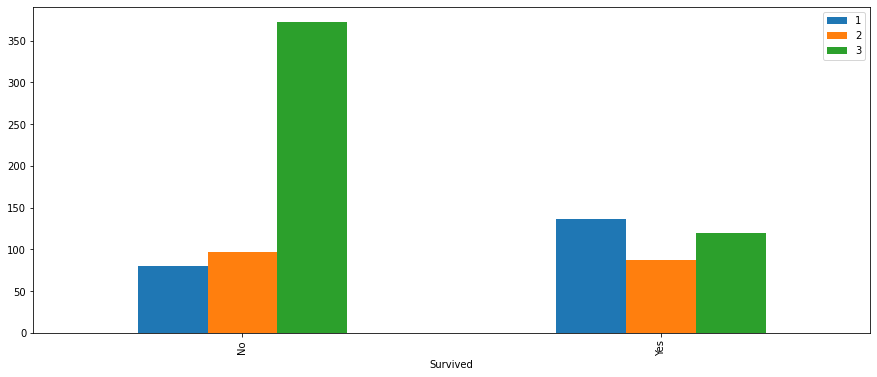

In [69]:
bar_charts(titanic, ('Pclass'))

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

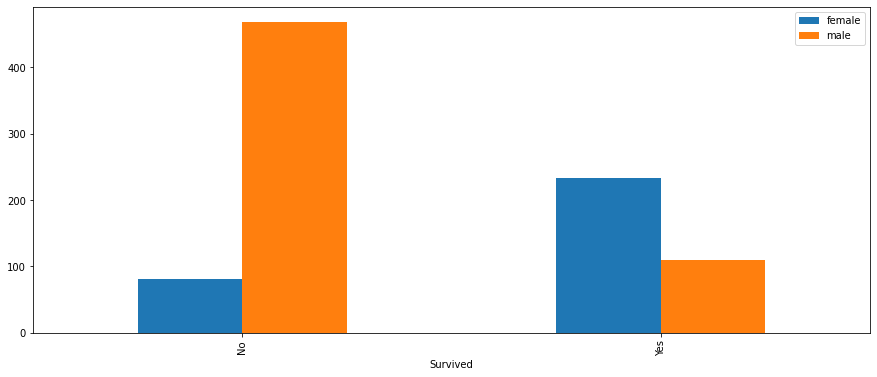

In [70]:
# ANSWER
bar_charts(titanic, ('Sex'))

## Parch

Parch = Number of parents of children travelling with each passenger.

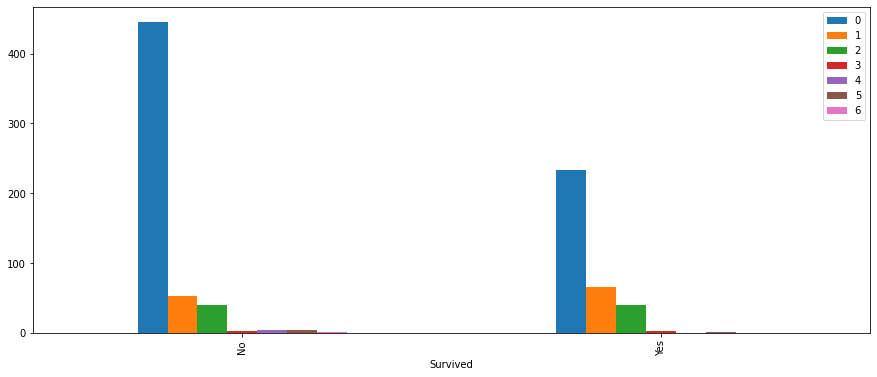

In [71]:
# ANSWER
bar_charts(titanic, ('Parch'))

## SibSp

## Embarked

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [72]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [73]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Record,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Record,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Record,S


In [74]:
# ANSWER
temp_var = []
for value in titanic.Fare:
    new_class = create_fare_class(value)
    temp_var.append(new_class)

titanic['FareClass'] = temp_var

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Record,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Record,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Record,S,4


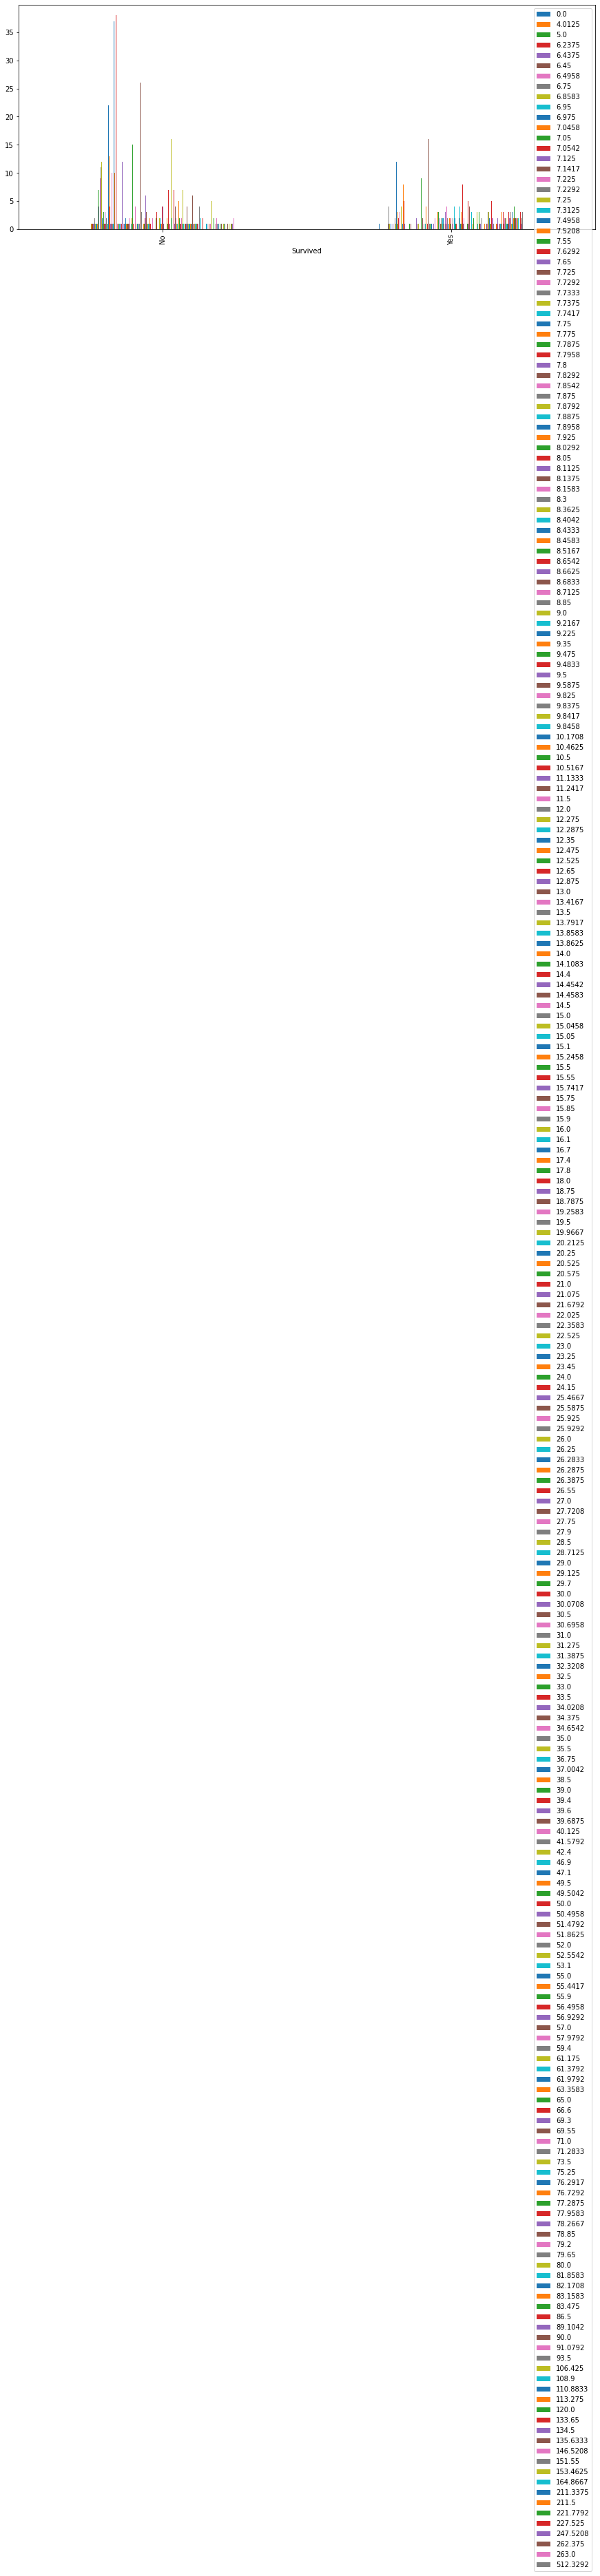

In [75]:
bar_charts(titanic, ('Fare'))

## Age Class

In [77]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FareClass        int64
dtype: object

In [78]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [79]:
# ANSWER
temp_var = []
for value in titanic.Age:
    age_class = create_age_class(value)
    temp_var.append(age_class)

titanic['AgeClass'] = temp_var

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareClass,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Record,S,4,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Record,S,4,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Record,S,4,3


# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [80]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FareClass,AgeClass
PassengerId,1.000000,-0.005007,-0.035144,0.039033,-0.057527,-0.001652,0.012658,0.003258,0.034715
Survived,-0.005007,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307,-0.307600,-0.030489
Pclass,-0.035144,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500,0.719670,-0.434001
Age,0.039033,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692,-0.164745,0.931621
SibSp,-0.057527,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651,-0.380692,-0.252931
Parch,-0.001652,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225,-0.387100,-0.141705
Fare,0.012658,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000,-0.599129,0.130440
FareClass,0.003258,-0.307600,0.719670,-0.164745,-0.380692,-0.387100,-0.599129,1.000000,-0.183863
AgeClass,0.034715,-0.030489,-0.434001,0.931621,-0.252931,-0.141705,0.130440,-0.183863,1.000000


# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [95]:
# ANSWER
#titanic.dtypes
older_pop = titanic[titanic.Age >= 35]
younger_pop = titanic[titanic.Age < 35]

older_sample = older_pop.sample(100)
younger_sample = younger_pop.sample(100)

older_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareClass,AgeClass
306,307,1,1,"Fleming, Miss. Margaret",female,35.0,0,0,17421,110.8833,No Record,C,1,3
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,No Record,Q,2,4
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,No Record,S,4,4
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,No Record,S,4,4
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,No Record,S,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,1,1,"Woolner, Mr. Hugh",male,40.0,0,0,19947,35.5000,C52,S,1,4
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,35.0,1,0,19996,52.0000,C126,S,1,3
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,1,4
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,No Record,S,3,4


### Set alpha (let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [94]:
# ANSWER
alpha =0.05
younger_sample.Survived.mean()
older_sample.Survived.mean()

0.37

### Calculate point estimate

In [97]:
a = younger_sample['Survived']
b = older_sample['Survived']

In [103]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)
N = len(older_sample)
s

0.49594313782892074

### Calculate test statistic

In [104]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [106]:
## Compare with the critical t-value
## Degrees of freedom
from scipy import stats
df = 2*N - 2

#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)

In [107]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 0.28515639284053157
p = 0.7758223843999645


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [108]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [109]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 0.28515639284053157
p = 0.7758223843999645
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



